# HW 1

In [110]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [112]:
diamonds_df = pd.read_csv('diamonds.csv')

In [113]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


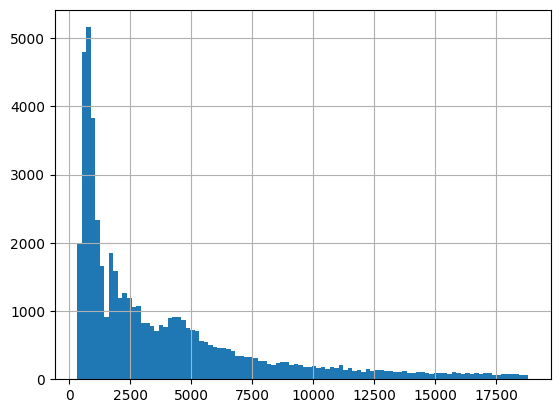

In [114]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [115]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [116]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [117]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [118]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [120]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [121]:
reg = LinearRegression().fit(X_train, y_train)

In [122]:
y_pred = reg.predict(X_test)

In [123]:
score = r2_score(y_pred, y_test)

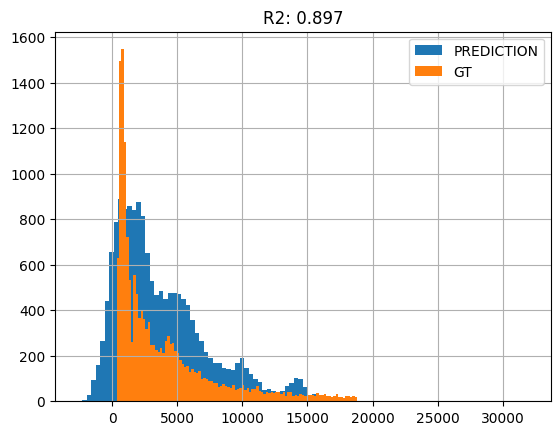

In [124]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [125]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        if y.ndim > 1:
            y = np.squeeze(y, axis=1)

        N, num_features = X.shape
        self.weight = np.random.randn(num_features)
        self.bias = 0.0

        for _ in range(self.n_iter):
            error = (X @ self.weight + self.bias - y)
            gradient_w = 2 / N * X.T @ error
            gradient_b = 2 / N * np.sum(error)

            self.weight -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return X @ self.weight + self.bias

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return self.weight, self.bias

reg = LinearRegressorGD(learning_rate=0.35)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_test, y_pred)

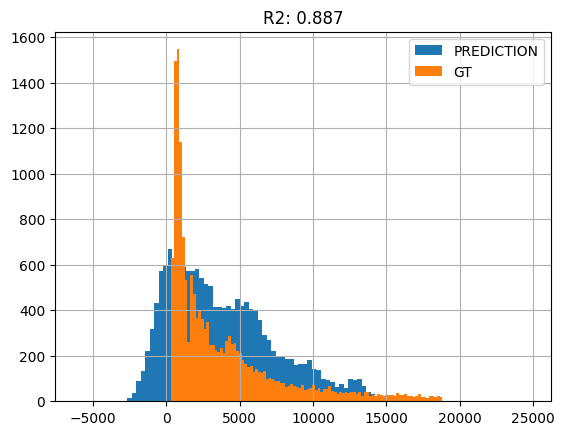

In [126]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [127]:
class Linear:
    def __init__(self, in_features, out_features, learning_rate):
        self.in_features = in_features
        self.out_features = out_features
        self.learning_rate = learning_rate

        limit = np.sqrt(6 / (in_features + out_features))
        self.W = np.random.uniform(-limit, limit, (in_features, out_features))

        self.b = np.zeros(out_features)

        self.input = None

    def __call__(self, X):
        self.input = X
        return X @ self.W + self.b

    def backprop(self, grad):
        grad_W = self.input.T @ grad
        grad_b = np.sum(grad, axis=0)
        new_grad = grad @ self.W.T

        self.W -= self.learning_rate * grad_W
        self.b -= self.learning_rate * grad_b

        return new_grad

In [128]:
class Sigmoid:
    def __init__(self):
        self.output = None

    def __call__(self, X):
        self.output = 1 / (1 + np.exp(-X))
        return self.output

    def backprop(self, grad):
        return grad * self.output * (1 - self.output)

In [129]:
from tqdm import tqdm

class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter

        self.layers = None
        self.prediction = None

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        for layer in self.layers:
            X = layer(X)

        self.prediction = X
        return self.prediction

    def backward(self, X, y):
        """
        Реализация backward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        N = X.shape[0]

        grad = 2 * (self.prediction - y) / N
        for layer in reversed(self.layers):
            grad = layer.backprop(grad)

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        _, num_features = X.shape
        self.layers = []

        for hidden_dim in self.hidden_layer_sizes:
            self.layers.append(Linear(num_features, hidden_dim, self.learning_rate))
            self.layers.append(Sigmoid())
            num_features = hidden_dim

        self.layers.append(Linear(num_features, 1, self.learning_rate))

        for _ in tqdm(range(self.n_iter)):
            self.forward(X)
            self.backward(X, y)


    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return self.forward(X)


In [130]:
X_train_normalized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_normalized = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [131]:
def score(model):
    model.fit(X_train_normalized, y_train)
    pred = model.predict(X_test_normalized)
    score = r2_score(pred, y_test)
    print(f"MLP score : {score}")

In [132]:
model = MLPRegressor(learning_rate=3e-4, n_iter=200)
score(model)

100%|██████████| 200/200 [00:38<00:00,  5.22it/s]


MLP score : 0.8190549333763042


In [133]:
model = MLPRegressor(hidden_layer_sizes=(10, 100), learning_rate=3e-4, n_iter=300)
score(model)

100%|██████████| 300/300 [01:04<00:00,  4.64it/s]


MLP score : 0.8656971458214554
